In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import sum as spark_sum
# Step 3: Initialize a Spark session
spark = SparkSession.builder \
    .appName("BigDataProcessing") \
    .config("spark.executor.memory", "4g") \
    .config("spark.driver.memory", "4g") \
    .getOrCreate()


your 131072x1 screen size is bogus. expect trouble
24/11/02 15:39:50 WARN Utils: Your hostname, J4Hp resolves to a loopback address: 127.0.1.1; using 10.255.255.254 instead (on interface lo)
24/11/02 15:39:50 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/11/02 15:39:51 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [ ]:
#  Load your CSV file into a Spark DataFrame
# Replace "June2024.csv" with the path to your actual data file
data = spark.read.csv("June2024.csv", header=True, inferSchema=True)
# Step 5: Group by 'TICKET_ISSUE_DATE' and calculate the sum for 'NO_OF_ADULT' and 'NO_OF_CHILD'
summary_data = data.groupBy("TICKET_ISSUE_DATE") \
    .agg(
        spark_sum("NO_OF_ADULT").alias("NO_OF_ADULT"),
        spark_sum("NO_OF_CHILD").alias("NO_OF_CHILD")
    )



In [8]:
# # Step 6: Save the summarized data to a new CSV file
# # Save to a directory called "filtered_data" as individual CSV files
# summary_data.write.csv("filtered_data_spark", header=True, mode="overwrite")
# summary_data.coalesce(1).write.csv("filtered_data_spark_single", header=True, mode="overwrite")

# # For a single output file, uncomment the following line:
# # summary_data.coalesce(1).write.csv("filtered_data", header=True, mode="overwrite")

# print("Summarized data saved to 'filtered_data' directory")


Summarized data saved to 'filtered_data' directory


In [6]:
# Step 7: Stop the Spark session after completing the tasks
spark.stop()


In [ ]:
import pandas as pd
from pandas import read_csv
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
# from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
 
df = summary_data.toPandas()
df['TICKET_ISSUE_DATE'] = pd.to_datetime(df['TICKET_ISSUE_DATE'])
df.set_index('TICKET_ISSUE_DATE', inplace=True)
df.sort_index(inplace=True)
print(df)
sc = MinMaxScaler(feature_range = (0, 1))
scaled_data = sc.fit_transform(df)
# scaled_data


                   NO_OF_ADULT  NO_OF_CHILD
TICKET_ISSUE_DATE                          
2024-05-31               12469           72
2024-06-01               90840          861
2024-06-02               60586         1085
2024-06-03              111135          920
2024-06-04               96509          416
2024-06-05              108695          368
2024-06-06              105394          347
2024-06-07              126361          462
2024-06-08               83024          676
2024-06-09               68658          974
2024-06-10              130975          435
2024-06-11              145606          540
2024-06-12              140884          482
2024-06-13              160832          738
2024-06-14              178543          912
2024-06-15              176504         1904
2024-06-16              112860         2098
2024-06-17              128502         2416
2024-06-18              184246         1069
2024-06-19              173420          790
2024-06-20              185465  

/tmp/ipykernel_2555/4077773516.py:15: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['TICKET_ISSUE_DATE'] = pd.to_datetime(df['TICKET_ISSUE_DATE'])


In [3]:

Train = scaled_data[:16]
Test = scaled_data[16:]

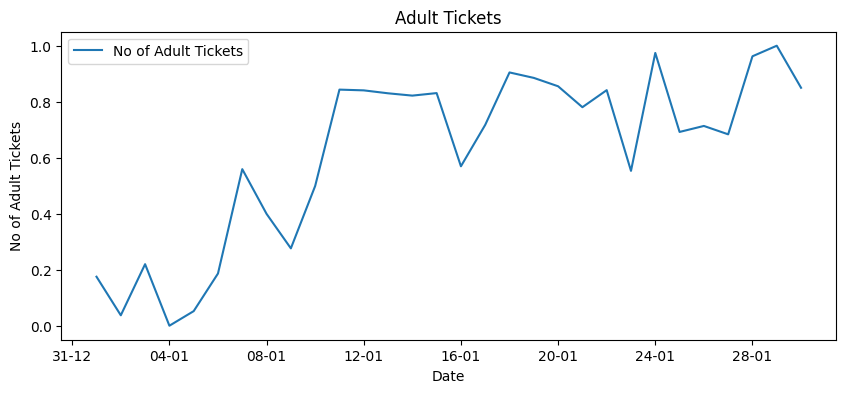

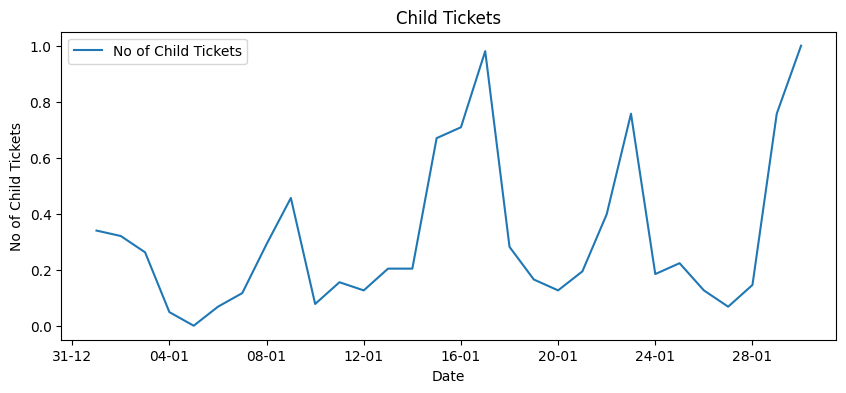

In [4]:
import matplotlib.dates as mdates

# Adult Tickets
plt.figure(figsize=(10, 4))
adult_scaled = [x for x, y in scaled_data]
plt.plot(df.index, adult_scaled, label='No of Adult Tickets')
plt.title('Adult Tickets')
plt.xlabel('Date')
plt.ylabel('No of Adult Tickets')
plt.legend()

# Set date format to only day and month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
# Set major ticks to appear every 4 days
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4))

plt.show()

# Child Tickets
plt.figure(figsize=(10, 4))
child_scaled = [y for x, y in scaled_data]
plt.plot(df.index, child_scaled, label='No of Child Tickets')
plt.title('Child Tickets')
plt.xlabel('Date')
plt.ylabel('No of Child Tickets')
plt.legend()

# Set date format to only day and month
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%d-%m'))
# Set major ticks to appear every 4 days
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=4))

plt.show()


In [5]:
n_input = 3
n_features = 2
# time series generation on test data
#This tool automatically creates sequences of data for training a time series model. 
# It generates small batches of data in the format needed for time series models.
generator = TimeseriesGenerator(Train, Train, length = n_input, batch_size = 1)   

In [22]:
print(Train)
generator[0]#first batch of data


[[0.17502434 0.33980583]
 [0.0372444  0.32038835]
 [0.219815   0.26213592]
 [0.         0.04854369]
 [0.05209348 0.        ]
 [0.18646543 0.06796117]
 [0.55915287 0.11650485]
 [0.39946446 0.29126214]
 [0.27629017 0.45631068]
 [0.49902629 0.0776699 ]
 [0.84323272 0.15533981]
 [0.84055501 0.12621359]
 [0.83008763 0.2038835 ]
 [0.8218111  0.2038835 ]
 [0.83081792 0.66990291]
 [0.56937683 0.70873786]]


(array([[[0.17502434, 0.33980583],
         [0.0372444 , 0.32038835],
         [0.219815  , 0.26213592]]]),
 array([[0.        , 0.04854369]]))

In [36]:
model = Sequential([
    Bidirectional(LSTM(units=100, activation='tanh'), input_shape=(n_input, n_features)),
    Dense(units=2, activation='tanh')
])

/home/jeev/.local/lib/python3.10/site-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
# compile the model

model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['accuracy'])

In [38]:
# model training

history = model.fit(generator, epochs = 5)


Epoch 1/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.5864 - loss: 0.2456
Epoch 2/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9008 - loss: 0.0736
Epoch 3/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5951 - loss: 0.0498  
Epoch 4/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8101 - loss: 0.0432 
Epoch 5/5
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8618 - loss: 0.0305


In [39]:
Test

array([[0.71738072, 0.98058252],
       [0.90457644, 0.2815534 ],
       [0.88510224, 0.16504854],
       [0.85516066, 0.12621359],
       [0.78042843, 0.19417476],
       [0.8412853 , 0.39805825],
       [0.55306719, 0.75728155],
       [0.97419669, 0.18446602],
       [0.69206426, 0.22330097],
       [0.71348588, 0.12621359],
       [0.6835443 , 0.06796117],
       [0.96226874, 0.14563107],
       [1.        , 0.75728155],
       [0.84980526, 1.        ]])

In [40]:
# time series generation on test data

test_generator = TimeseriesGenerator(Test, Test, length = n_input, batch_size = 1)


In [41]:
# model evaluation on test data
test_loss = model.evaluate(test_generator)
print(f'Test Loss: {test_loss}')

/home/jeev/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8784 - loss: 0.0368  
Test Loss: [0.058295127004384995, 0.8181818127632141]


In [42]:
num_sequences = len(test_generator)
print("Total number of sequences:", num_sequences)

Total number of sequences: 11


In [43]:
# prediction and output

x_test, y_test = test_generator[8]
prediction = model.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step


In [44]:
x_test

array([[[0.69206426, 0.22330097],
        [0.71348588, 0.12621359],
        [0.6835443 , 0.06796117]]])

In [45]:
y_test

array([[0.96226874, 0.14563107]])

In [47]:
# Calculate the error percentage
error_percentage = np.abs((y_test[0] - prediction[0]) / y_test[0]) * 100
print(f"Actual: {y_test[0]}, Predicted: {prediction}")
print(f"Error Percentage: {error_percentage}")


Actual: [0.96226874 0.14563107], Predicted: [[0.6688677  0.29379398]]
Error Percentage: [ 30.49055043 101.7385304 ]
